In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [2]:
data=pd.read_csv("train.csv")
data.drop(columns='ID',inplace=True)
data_test=pd.read_csv("test.csv")
id_col=data_test['ID']
data_test.drop(columns='ID',inplace=True)

In [92]:
print(data.shape)

(10834, 17)


In [148]:
class dry_beans :
    def __init__(self,data_train,data_test):
        self.data_train=data_train
        self.data_test=data_test
        
        
    def null_check(self):
        return self.data_train.isnull().sum()
    
    def duplicates_check(self):
        return self.data_train.duplicated().sum()
    
    def disp_info(self):
        return self.data_train.info()
    
    def balance_data(self):
        plt.hist(self.data_train['y'],bins=int(np.sqrt(len(self.data_train['y']))))
        plt.show()
        
        class_count_0, class_count_1, class_count_2, class_count_3, class_count_4, class_count_5, class_count_6 = self.data_train['y'].value_counts()

        # Separate class
        class_0 = self.data_train[self.data_train['y'] == 'DERMASON']
        class_1 = self.data_train[self.data_train['y'] == 'SIRA']
        class_2 = self.data_train[self.data_train['y'] == 'SEKER']
        class_3 = self.data_train[self.data_train['y'] == 'HOROZ']
        class_4 = self.data_train[self.data_train['y'] == 'CALI']
        class_5 = self.data_train[self.data_train['y'] == 'BARBUNYA']
        class_6 = self.data_train[self.data_train['y'] == 'BOMBAY']
        
        class_0_over = class_0.sample(class_count_6, replace=True)
        class_1_over = class_1.sample(class_count_6, replace=True)
        class_2_over = class_2.sample(class_count_6, replace=True)
        class_3_over = class_3.sample(class_count_6, replace=True)
        class_4_over = class_4.sample(class_count_6, replace=True)
        class_5_over = class_5.sample(class_count_6, replace=True)
        class_6_over = class_6.sample(class_count_6, replace=True)

        data = pd.concat([class_1_over,
        class_2_over,
        class_3_over,
        class_4_over,
        class_5_over,
        class_6_over,
        class_0_over], axis=0)
        data['y'].value_counts().plot(kind='bar', title='count (target)')
        return data

  
    def visualize_data(self,data):
            data_visualize=data.copy()
            target_visualize=data_visualize['y']
            data_visualize.drop(['y'],axis=1,inplace=True)
            for col in data_visualize.columns:
                    sns.boxplot(target_visualize,data_visualize[col])
                    plt.show()
                    
    

    def Decision_tree_importance(self,data):
            from sklearn.tree import DecisionTreeClassifier
            data=data.copy()
            y=data['y']
            X=data.drop('y',axis=1)
            clf=DecisionTreeClassifier()
            clf.fit(X,y)
            importances=clf.feature_importances_
            forest_importances = pd.Series(importances, index=X.columns)
            fig, ax = plt.subplots()
            forest_importances.plot.bar(yerr=forest_importances, ax=ax)
            ax.set_title("Feature importances using MDI")
            ax.set_ylabel("Mean decrease in impurity")
            fig.tight_layout()
            
            
    def disp_skewness(self,data):

        data.hist(bins=int(np.sqrt(len(self.data_train))),figsize=(15,15));
        skew= data.select_dtypes(np.number).skew()
        abs_skew = abs(skew)
        kurt = data.select_dtypes(np.number).kurt()
        skew_kurt_table = pd.concat([skew,abs_skew,kurt], axis = 1,
                                    keys =['Skew','Absolute Skew','Kurtosis']).sort_values("Skew",ascending = False)
        skew_kurt_table['Skewed'] = skew_kurt_table['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
        return skew_kurt_table

   

    def encode_target(self,data):
            data['y'].replace({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6},inplace=True)
            return data
        
    def decode_target(self,data):
        data['y'].replace({0:'DERMASON',1:'SIRA',2:'SEKER',3:'HOROZ',4:'CALI',5:'BARBUNYA',6:'BOMBAY'},inplace=True)
        return data
    
    def disp_corr(self,data):
        correlation=data.corr()
        return correlation.style.background_gradient(cmap='coolwarm')
    
    def remove_outliers(self,data):  ##?????
        skew_check=self.disp_skewness(data)
        skewed_columns=skew_check.index[skew_check['Skewed'] == True].tolist()
        z_scores = stats. zscore(data[skewed_columns])
        abs_z_scores = np. abs(z_scores)
        filtered_entries = (abs_z_scores < 2.5). all(axis=1)
        print(filtered_entries .shape)
        new_df = data[filtered_entries]
        return new_df
    
    def feature_engineering(self,data):
        pass
    
    def make_PCA(self,data,n_components=7):
        from sklearn.preprocessing import StandardScaler,RobustScaler
        scale=RobustScaler()
        from sklearn.decomposition import PCA
        data_new_features=scale.fit_transform(data)
        pca=PCA()
        pca.fit(data_new_features)
        exp_var=pca.explained_variance_ratio_
        exp_cumsum=np.cumsum(exp_var)
        plt.plot(exp_cumsum)
        pca=PCA(n_components=n_components)
        data_scaled=pca.fit_transform(data_new_features)
        data_scaled=pd.DataFrame(data_scaled)
        return data_scaled
    
    def data_prep (self,data,test=False):
            if test==True:
                data_scaled=scale.transform(data)
                data_scaled=pca.transform(data_scaled)
                data_scaled=pd.DataFrame(data_scaled)
                return data_scaled
            else :
                new_df=self.remove_outliers(data)
                labels=new_df['y']
                new_df=new_df.drop('y',axis=1)
                data_scaled=self.make_PCA(new_df)
                return data_scaled,labels
            
    def try_model(self,data_prepared):
        pass
            
    def train_on_all(self,data_train,data_val,y_train,y_val,bestmodel):
            data_tot=pd.concat([data_train,data_val])
            y=pd.concat([y_train,y_val])
            bestmodel.fit(data_tot,y)
            return bestmodel

      

    def generate_submission_file(data_test,predictions):
            data_test_to_model['y']=predictions
            s=decode_target(data_test_to_model)
            f=pd.concat([id_col,s['y']],axis=1)
            return f

In [135]:
dry_beans_scenario_1=dry_beans(data,data_test)

(10834,)


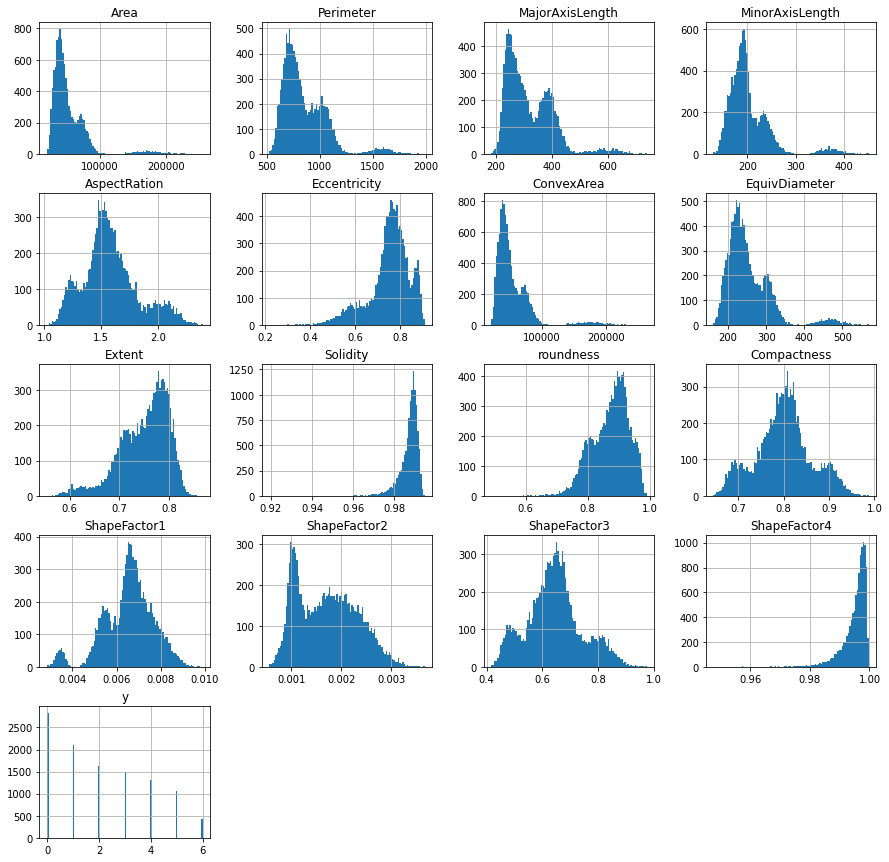

In [138]:
_,O=dry_beans_scenario_1.data_prep(data,88)

In [140]:
_

,0,1,2,3,4,5,6
0,-2.768135,2.394061,-0.952398,0.209485,0.839813,0.255208,0.045975
1,-2.336045,-0.495282,0.064622,0.572590,-0.422984,-0.216414,0.084969
2,-1.461696,-0.043687,-0.387651,-0.207734,-0.492593,-0.172806,-0.078314
3,-0.840777,0.231147,0.073880,-0.392207,0.178985,0.017783,-0.235932
4,-3.751575,1.916754,0.404680,0.029986,-0.244917,0.522442,0.306691
...,...,...,...,...,...,...,...
9311,-2.564994,1.170824,0.049924,0.049317,0.036783,0.214348,-0.027536
9312,-1.724002,-1.084679,0.215162,-0.355299,-0.075084,-0.198747,0.016830
9313,3.648630,1.179244,-1.781667,0.252250,0.293638,-0.122431,0.159374
9314,0.303473,-0.052096,0.043388,-0.852869,0.860354,-0.125403,-0.200858


In [101]:
_.skew()

Area               0.895359
Perimeter          0.623382
MajorAxisLength    0.576835
MinorAxisLength    0.607043
AspectRation       0.624159
Eccentricity      -0.738867
ConvexArea         0.898496
EquivDiameter      0.608384
Extent            -0.514718
Solidity          -0.998977
roundness         -0.490783
Compactness       -0.064453
ShapeFactor1       0.057633
ShapeFactor2       0.147655
ShapeFactor3       0.115404
ShapeFactor4      -1.310383
y                  0.532493
dtype: float64